## BSSE2301 SOFTWARE ENGINEERING MINI PROJECT 2025

In [7]:
import pandas as pd


In [8]:
df = pd.read_csv('climate_action_data.csv ')


#### Loading the Data_Set

In [9]:
print(df)   

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2   

    Crop_Type Fertilizer_Re

#### First Five Rows 

In [10]:
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


#### Shape of the data

In [11]:
df.shape 

(913, 10)

#### Display data types and non-null counts 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


### CHECKING FOR ISSUES 

#### Count missing values in each column

In [15]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


####  Check for 'error' values

In [16]:
print((df == 'error').sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


####  Check for duplicate records


In [17]:
print(df.duplicated().sum())

111


### SUMMARY OF ISSUES 

#### Erroneous Entries

A total of 5 'error' values were found in key numeric columns, including: Soil_Moisture(%), Soil_pH, Temperature(C), Humidity(%),   Fertilizer_Recommended(kg/ha), Irrigation_Recommended(mm)

#### Missing Values

4 missing values in: Date column  and Crop_Type column

####  Incorrect Data Types 

All numeric fields were initially stored as strings (object), requiring type conversion

#### Duplicate Records 

111 duplicate rows were detected in the dataset.

### CLEANING THE DATA 

In [20]:
import numpy as np

####  Replace 'error' with NaN

In [21]:
df.replace('error', np.nan, inplace=True)

#### Convert numeric columns to appropriate types

In [22]:
numeric_columns = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

####  Drop duplicate rows

In [23]:
df.drop_duplicates(inplace=True)

####  Handle missing values

In [24]:
# Drop rows with missing 'Date' and 'Crop_Type' 
df.dropna(subset=['Date', 'Crop_Type'], inplace=True)

#Fill missing numeric values with column means
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

#### Confirm missing values

In [26]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [28]:
#Updated Datatypes
print(df.dtypes)

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object


### EXPLORATORY DATA ANALYSIS

In [29]:
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,44.774563,6.246946,26.469962,60.084791,87.304816,17.401521
std,20.439031,1.021199,4.856848,17.411478,34.856073,7.149158
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.970000,5.330000,22.325000,46.100000,57.350000,11.300000
50%,45.205000,6.246946,26.600000,59.950000,85.750000,17.401521
75%,62.642500,7.080000,30.600000,75.275000,117.600000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


### Visualizing the distribution of numeric variables using histograms

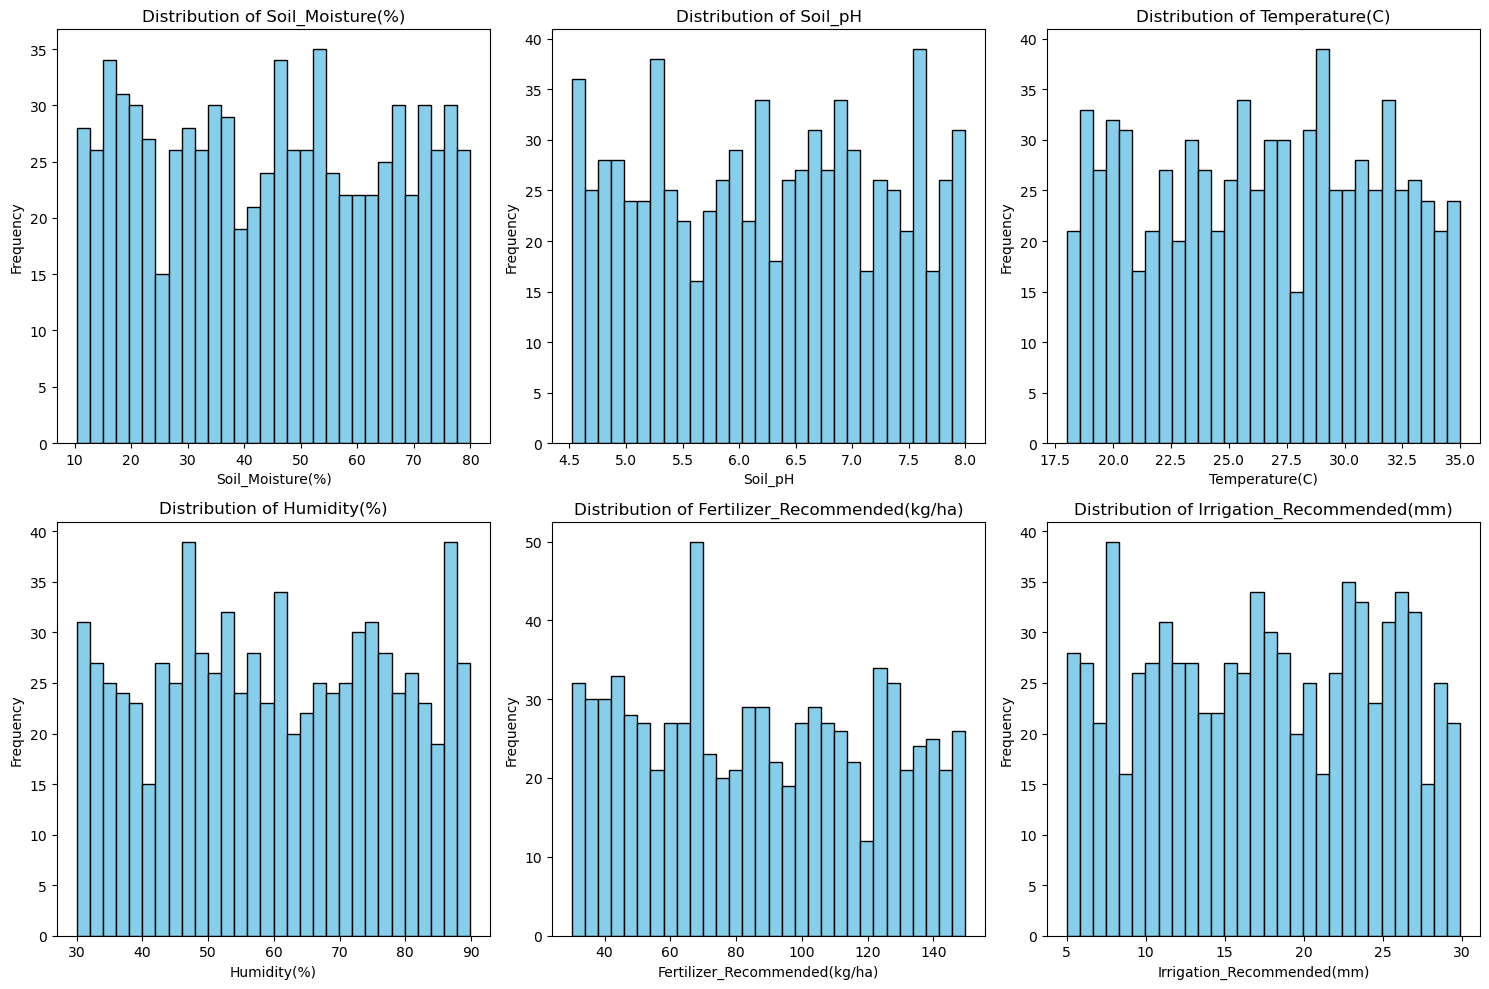

In [31]:
import matplotlib.pyplot as plt

# List of numeric columns to plot
num_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
            'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Correlation Heatmap

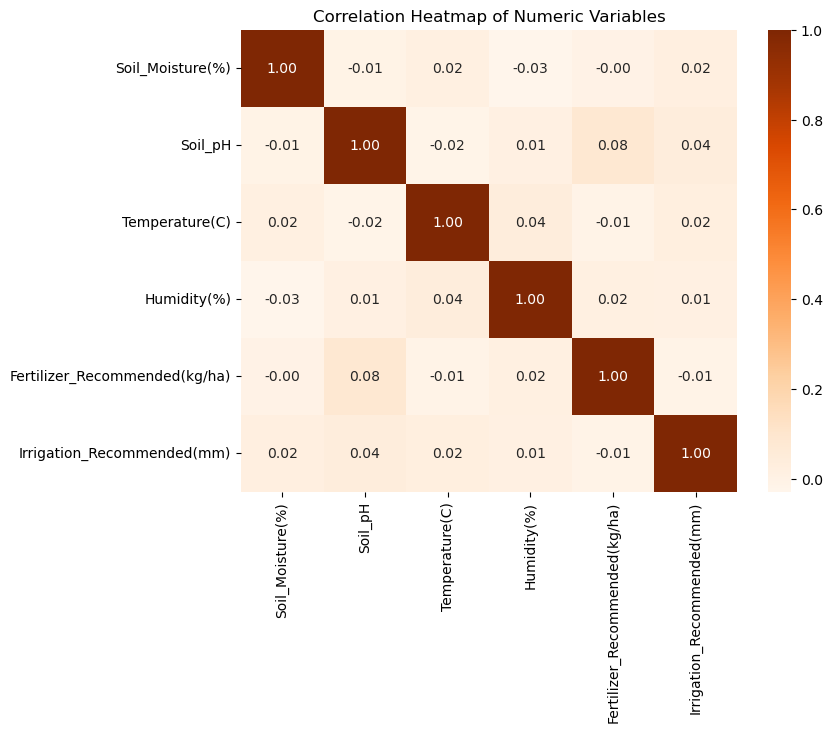

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
            'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

# Calculate correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Oranges', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


#### Identify Variables That Most Influence Fertilizer Recommendations

In [39]:
# Correlation with fertilizer recommendations
fert_corr = df[num_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

# Display the correlation values
print(fert_corr)


Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
Name: Fertilizer_Recommended(kg/ha), dtype: float64


#### Observation & Deduction

Soil_pH shows the highest positive correlation with fertilizer recommendations.

Therefore, the variable that most influences fertilizer recommendations is: Soil_Ph



### Determine the crop type with the highest average soil moisture

In [41]:
# Group by Crop_Type and calculate average Soil_Moisture
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

# Display result
print("Average Soil Moisture by Crop Type:")
print(avg_soil_moisture)

# Identify the crop with the highest average soil moisture
top_crop = avg_soil_moisture.idxmax()
top_moisture = avg_soil_moisture.max()

print(f"\n The Crop with highest average soil moisture: {top_crop} ({top_moisture:.2f}%)")


Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.181654
Maize       44.950933
Beans       44.335063
Tomatoes    44.182919
Lettuce     42.929364
Name: Soil_Moisture(%), dtype: float64

 The Crop with highest average soil moisture: Wheat (47.18%)


### Suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.



In [42]:
# Filter crops with temperature above 30°C
hot_crops = df[df['Temperature(C)'] > 30]

# Group by Crop_Type to get average temperature and irrigation
irrigation_adjustments = hot_crops.groupby('Crop_Type')[['Temperature(C)', 'Irrigation_Recommended(mm)']].mean()

# Display result
print("Average Temperature and Irrigation for Crops Above 30°C:")
print(irrigation_adjustments.sort_values(by='Temperature(C)', ascending=False))


Average Temperature and Irrigation for Crops Above 30°C:
           Temperature(C)  Irrigation_Recommended(mm)
Crop_Type                                            
Lettuce         32.575676                   16.297297
Wheat           32.528571                   18.811429
Maize           32.430909                   16.625455
Tomatoes        32.404348                   18.919565
Beans           32.311538                   17.857692


### Suggestions

Since these crops experience temperatures above 30°C, they may face higher transpiration rates and increased water stress.

Therefore, Irrigation amounts should be maintained or slightly increased above average recommended values to ensure crops receive sufficient moisture.

## INSIGHTS AND RECOMMENDATIONS

Data Cleaning: 
Removed 111 duplicate records and replaced 'error' entries with NaN, handled of missing values and converting data types.

Descriptive Statistics:
Average soil moisture across crops is ~44.77%.
Soil pH averages around 6.25, suitable for most crops.
Average temperature is 26.47°C, with some crops experiencing >30°C.

Correlation Findings:
Soil pH shows the strongest positive correlation with fertilizer recommendations, suggesting soil acidity/alkalinity influences fertilizer needs.
Other factors like humidity, soil moisture, temperature, and irrigation have little direct correlation with fertilizer use.

Crop Soil Moisture:
Wheat has the highest average soil moisture (~47.18%), indicating it may require more water retention management.

Irrigation Recommendations for High Temperature Crops (>30°C):
Crops such as Lettuce, Wheat, Maize, Tomatoes, and Beans show average temps >30°C.
Irrigation should be maintained or slightly increased to prevent heat stress and maintain crop health.
Tomatoes and Wheat have higher irrigation needs (~18.8 mm), indicating priority for water allocation.

Remarks
Consider soil pH adjustments to optimize fertilizer efficiency.

### Cleaned_precision_agriculture_data.csv 

In [44]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
